In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.legend import Legend

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
city_data.head() 

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
city_data.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [4]:
ride_data.head() 

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [6]:
city_data.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
ride_data.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
# Combine the data into a single dataset
merged_data = pd.merge( ride_data,city_data,on = "city", how = "left")

# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# check if data number is correct (should be 2375)

merged_data.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [10]:
merged_data.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

# Bubble Plot of Ride Sharing Data

In [11]:
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# group by city
groupby_type_city = merged_data.groupby(["type","city"]).agg({"fare":['sum','mean'],"ride_id":['count']})
#groupby_type_city = groupby_type_city()
groupby_type_city.head()


fare            ride_id
                         sum       mean   count
type  city                                     
Rural Bradshawfurt    400.64  40.064000      10
      Garzaport        72.37  24.123333       3
      Harringtonfort  200.82  33.470000       6
      Jessicaport     216.08  36.013333       6
      Lake Jamie      206.15  34.358333       6

In [13]:
 # calculate average fare per city
#groupby_type_city["average_fare_per_city"] = merged_data.groupby(["type","city"])["fare"].mean()
#groupby_type_city.head()

In [14]:
final_data = pd.merge(groupby_type_city,city_data, on ='city',how='left' )
final_data.head()

C:\Users\Mitsu\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,city,"(fare, sum)","(fare, mean)","(ride_id, count)",driver_count,type
0,Bradshawfurt,400.64,40.064000,10,7,Rural
1,Garzaport,72.37,24.123333,3,7,Rural
2,Harringtonfort,200.82,33.470000,6,4,Rural
3,Jessicaport,216.08,36.013333,6,1,Rural
4,Lake Jamie,206.15,34.358333,6,4,Rural


In [15]:
# Merged data has 2 different levels and it is not easy to handle. 
# I flattened the column level to level = 0

final_data.columns = final_data.columns.get_level_values(0)
final_data.columns

Index([              'city',      ('fare', 'sum'),     ('fare', 'mean'),
       ('ride_id', 'count'),       'driver_count',               'type'],
      dtype='object')

In [16]:
# Remove (,) to make it easier to handle columns name
final_data.columns = [' '.join(col).strip() for col in final_data.columns.values]
final_data.columns

Index(['c i t y', 'fare sum', 'fare mean', 'ride_id count',
       'd r i v e r _ c o u n t', 't y p e'],
      dtype='object')

In [19]:
# Rename the columns
final_data=final_data.rename(columns={'city' : 'city'  , \
                                      'fare sum' : 'Total fare', \
                                       'fare mean':'average_fare_per_city', \
                                       'ride_id count':'ride_count_per_city',
                                       'd r i v e r _ c o u n t': 'driver_count', \
                                      't y p e':'type'
                             })
final_data.head()

,c i t y,Total fare,average_fare_per_city,ride_count_per_city,driver_count,type
0,Bradshawfurt,400.64,40.064000,10,7,Rural
1,Garzaport,72.37,24.123333,3,7,Rural
2,Harringtonfort,200.82,33.470000,6,4,Rural
3,Jessicaport,216.08,36.013333,6,1,Rural
4,Lake Jamie,206.15,34.358333,6,4,Rural


In [22]:
# extract urban data
urban = final_data.loc[final_data['type']=='Urban',['driver_count','average_fare_per_city','ride_count_per_city']]
urban.head()

,driver_count,average_fare_per_city,ride_count_per_city
54,12,24.641667,18
55,26,25.332273,22
56,52,28.314444,27
57,41,24.501852,27
58,49,25.842632,19


In [23]:
# extract suburban data
suburban = final_data.loc[final_data['type']=='Suburban',['driver_count','average_fare_per_city','ride_count_per_city']]
suburban.head()

,driver_count,average_fare_per_city,ride_count_per_city
18,11,36.422500,16
19,22,32.956111,18
20,10,35.437368,19
21,23,30.894545,22
22,23,31.995882,17


In [24]:
# extract rural data
rural = final_data.loc[final_data['type']=='Rural',['driver_count','average_fare_per_city','ride_count_per_city']]
rural

,driver_count,average_fare_per_city,ride_count_per_city
0,7,40.064000,10
1,7,24.123333,3
2,4,33.470000,6
3,1,36.013333,6
4,4,34.358333,6
5,2,26.061818,11
6,6,34.997500,12
7,2,43.278333,6
8,1,36.745000,4
9,8,29.130000,9


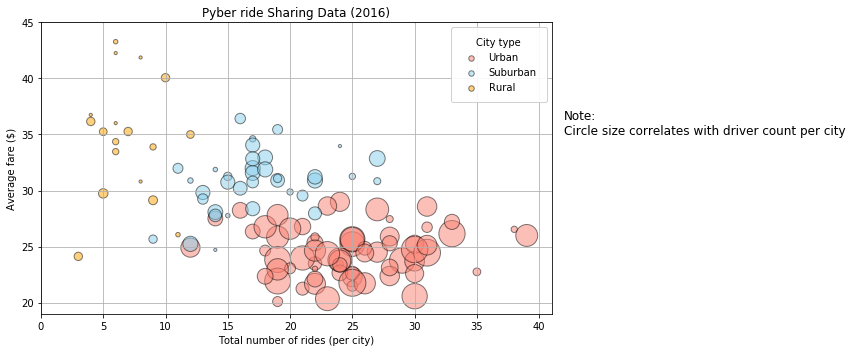

In [74]:
# Build the scatter plots for each city types
plt.figure(figsize=(12,5))
plt.grid()


plt.scatter(urban["ride_count_per_city"], urban["average_fare_per_city"],  \
            marker="o", facecolors="salmon", edgecolors="black", s=urban["driver_count"]*10, alpha=0.5, label=None)

plt.scatter(suburban["ride_count_per_city"], suburban["average_fare_per_city"], \
            marker="o", facecolors="skyblue", edgecolors="black", s=suburban["driver_count"]*10, alpha=0.5 , label=None
          )

plt.scatter(rural["ride_count_per_city"], rural["average_fare_per_city"], \
            marker="o",facecolors="orange", edgecolors="black",s=rural["driver_count"]*10, alpha=0.5 , label=None)

# create fake data for the legend
plt.scatter(0, 0,  \
            marker="o", facecolors="salmon", edgecolors="black", s=30, alpha=0.5, label = "Urban") 

plt.scatter(0, 0,  \
            marker="o", facecolors="skyblue", edgecolors="black", s=30, alpha=0.5, label = "Suburban") 

plt.scatter(0, 0, marker="o", facecolors="orange", edgecolors="black", s=30, alpha=0.5, label = "Rural") 

# add legend
plt.legend(numpoints=1, loc=1, borderpad=1, \
            frameon=True, framealpha=0.9, title="City type",scatterpoints = 1)

# set xlim and ylim
plt.ylim(19, 45)
plt.xlim(0, 41)

# add text outside the graph
# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city", fontsize=12)

# Incorporate the other graph properties
plt.title("Pyber ride Sharing Data (2016)")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average fare ($)")
plt.tight_layout()
#plt.show()

# Save Figure
plt.savefig("Images/Pyber_bubble.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [52]:
final_data.head()

,c i t y,Total fare,average_fare_per_city,ride_count_per_city,driver_count,type
0,Bradshawfurt,400.64,40.064000,10,7,Rural
1,Garzaport,72.37,24.123333,3,7,Rural
2,Harringtonfort,200.82,33.470000,6,4,Rural
3,Jessicaport,216.08,36.013333,6,1,Rural
4,Lake Jamie,206.15,34.358333,6,4,Rural


In [65]:
# Calculate Type Percents
# Total fare for all types
Total_fare_all_type = final_data["Total fare"].sum()
print(f"Total_fare_all_type:",Total_fare_all_type)

Total_fare_all_type: 63538.64


In [70]:
# Total fare for rural
Total_fare_rural = final_data.loc[final_data['type']=='Rural','Total fare'].sum()
Total_fare_rural_perc = Total_fare_rural / Total_fare_all_type *100

print(f"Total_fare_rural:",Total_fare_rural)
print(f"Total_fare_rural_perc:",Total_fare_rural_perc)

Total_fare_rural: 4327.93
Total_fare_rural_perc: 6.811492974983412


In [71]:
# Total fare for urban
Total_fare_urban = final_data.loc[final_data['type']=='Urban','Total fare'].sum()
Total_fare_urban_perc = Total_fare_urban / Total_fare_all_type *100

print(f"Total_fare_urban:",Total_fare_urban)
print(f"Total_fare_urban_perc:",Total_fare_urban_perc)

Total_fare_urban: 39854.38000000001
Total_fare_urban_perc: 62.724634962284384


In [73]:
# Total fare for suburban
Total_fare_suburban = final_data.loc[final_data['type']=='Suburban','Total fare'].sum()
Total_fare_suburban_perc = Total_fare_suburban / Total_fare_all_type *100

print(f"Total_fare_suburban:",Total_fare_suburban)
print(f"Total_fare_suburban_perc:",Total_fare_suburban_perc)

Total_fare_suburban: 19356.33
Total_fare_suburban_perc: 30.46387206273222


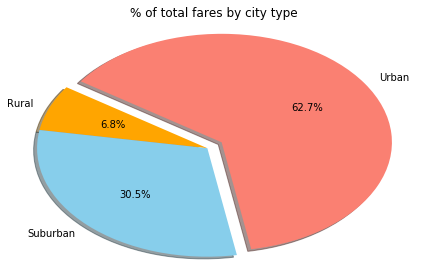

In [97]:
# Build Pie Chart
pies = ["Urban" , "Rural", "Suburban",]
perc = [Total_fare_urban_perc, Total_fare_rural_perc, Total_fare_suburban_perc]

colors = ['salmon', 'orange','skyblue']
explode = (0.1,0,0)


plt.pie( perc, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-80)

# set axis option to auto (to get like HW)
plt.axis("auto")

plt.title("% of total fares by city type")


plt.tight_layout()
#plt.show()

# Save Figure
plt.savefig("Images/Pyber_pie_fare.png")


In [98]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
final_data.head()

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()